In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from matplotlib.pyplot import figure
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)

mouse_drug_data_path=os.path.join('data', 'mouse_drug_data.csv')


clinical_trial_data_path =os.path.join('data', 'clinicaltrial_data.csv')

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_drug_df=pd.read_csv(mouse_drug_data_path)

print(mouse_drug_df.head())

clinical_trial_df=pd.read_csv(clinical_trial_data_path)

print(clinical_trial_df)
# Combine the data into a single dataset

merged_df=pd.merge(mouse_drug_df, clinical_trial_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']], 
                  on='Mouse ID', how='outer')
# Display the data table for preview
merged_df.head()


  Mouse ID      Drug
0     f234  Stelasyn
1     x402  Stelasyn
2     a492  Stelasyn
3     w540  Stelasyn
4     v764  Stelasyn
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0           45.000000                 0
4        c819          0           45.000000                 0
...       ...        ...                 ...               ...
1888     r944         45           41.581521                 2
1889     u364         45           31.023923                 3
1890     p438         45           61.433892                 1
1891     x773         45           58.634971                 4
1892     b879         45           72.555239                 2

[1893 rows x 4 columns]


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

mean_tumor_volume_by_drug_and_time=merged_df.groupby(['Drug', 'Timepoint']).agg({'Tumor Volume (mm3)':['mean']})




mean_tumor_volume_by_drug_and_time.columns=['average_tumor_vol']
mean_tumor_volume_by_drug_and_time.reset_index(inplace=True)

with pd.option_context('display.multi_sparse', False):
    print(mean_tumor_volume_by_drug_and_time.head(20))

# Convert to DataFrame

# Preview DataFrame


         Drug  Timepoint  average_tumor_vol
0   Capomulin          0          45.000000
1   Capomulin          5          44.266086
2   Capomulin         10          43.084291
3   Capomulin         15          42.064317
4   Capomulin         20          40.716325
5   Capomulin         25          39.939528
6   Capomulin         30          38.769339
7   Capomulin         35          37.816839
8   Capomulin         40          36.958001
9   Capomulin         45          36.236114
10   Ceftamin          0          45.000000
11   Ceftamin          5          46.503051
12   Ceftamin         10          48.285125
13   Ceftamin         15          50.094055
14   Ceftamin         20          52.157049
15   Ceftamin         25          54.287674
16   Ceftamin         30          56.769517
17   Ceftamin         35          58.827548
18   Ceftamin         40          61.467895
19   Ceftamin         45          64.132421


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

st_error_tumor_vol_df=merged_df.groupby(['Drug', 'Timepoint']).agg({'Tumor Volume (mm3)':['sem']})


#rename column
st_error_tumor_vol_df.columns=['st_error_tumor_vol']
st_error_tumor_vol_df.reset_index(inplace=True)

with pd.option_context('display.multi_sparse', False):
    print(st_error_tumor_vol_df.head())

        Drug  Timepoint  st_error_tumor_vol
0  Capomulin          0            0.000000
1  Capomulin          5            0.448593
2  Capomulin         10            0.702684
3  Capomulin         15            0.838617
4  Capomulin         20            0.909731


In [5]:



st_error_tumor_vol_df_pivot=st_error_tumor_vol_df.pivot(index='Timepoint', columns='Drug', values='st_error_tumor_vol')
st_error_tumor_vol_df_pivot.add_suffix("_ste")
st_error_tumor_vol_df_pivot


# Preview DataFrame



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [6]:
mean_tumor_volume_by_drug_and_time

,Drug,Timepoint,average_tumor_vol
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [7]:
# Minor Data Munging to Re-Format the Data Frames


mean_tumor_vol_df2=mean_tumor_volume_by_drug_and_time.pivot(index='Timepoint', columns='Drug', values='average_tumor_vol')
mean_tumor_vol_df2
    



    



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


<Figure size 1152x864 with 0 Axes>

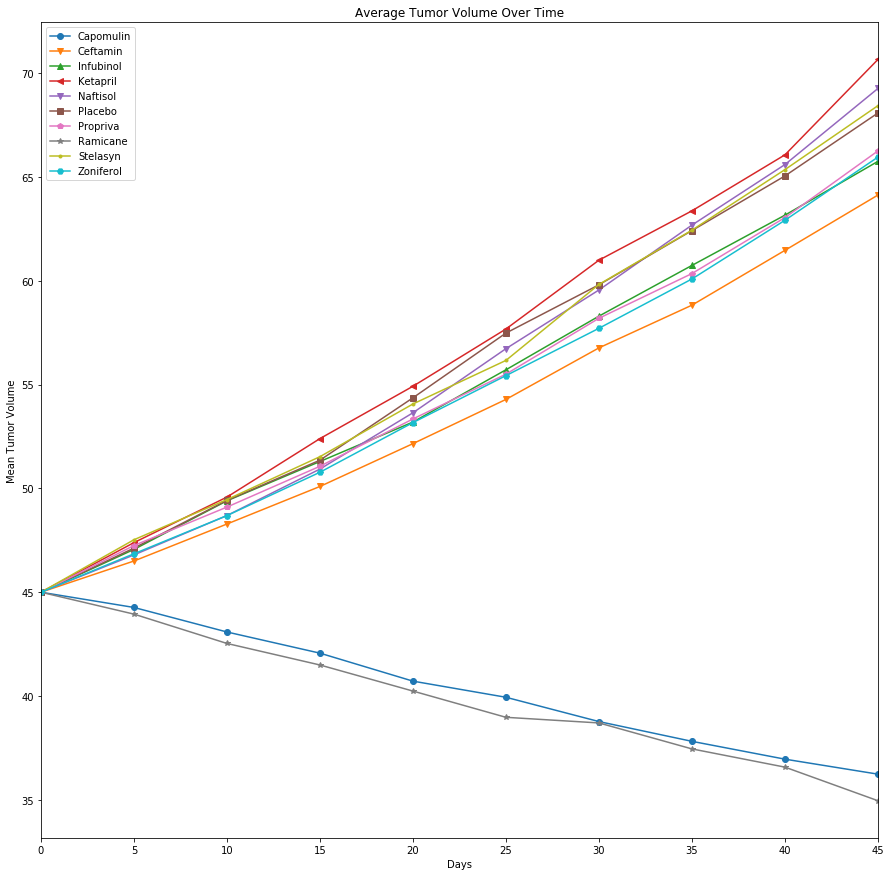

In [12]:
# Generate the Plot (with Error Bars)
plt.figure(num=1, figsize=(16,12))
this_plot=mean_tumor_vol_df2.plot(kind='line')

error_bars=st_error_tumor_vol_df_pivot


plt.xlabel('Days')
plt.ylabel('Mean Tumor Volume')
plt.title('Average Tumor Volume Over Time')
plt.gcf().set_size_inches(15, 15)

markers_list=['o', 'v', '^', '<', 'v', 's', 'p', '*', '.', 'H', 'D', 'X']

for i, line in enumerate(this_plot.get_lines()):
    line.set_marker(markers_list[i])

this_plot.legend(this_plot.get_lines(), mean_tumor_vol_df2.columns, loc='best')





In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_mt_site_df=merged_df.groupby(['Drug', 'Timepoint']).agg({'Metastatic Sites':['mean']})


mean_mt_site_df.columns=['mean_mt_site']
mean_mt_site_df.reset_index()



# Convert to DataFrame
mean_mt_site_df
# Preview DataFrame


In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

met_site_st_error_df=merged_df.groupby(['Drug', 'Timepoint']).agg({'Metastatic Sites':['sem']})

met_site_st_error_df.reset_index()
met_site_st_error_df.columns=['met_site_ste']

met_site_st_error_df

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames



# Preview that Reformatting worked


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
def cal_survival_rate():
    return 0

mice_count_grouped_df=merged_df.groupby(['Drug', 'Timepoint']).agg({'Mouse ID':['count']})
mice_count_grouped_df.columns=['mouse_count']
mice_count_grouped_df.reset_index(inplace=True)


mice_count_grouped_df_pivot=mice_count_grouped_df.pivot(index='Timepoint', columns='Drug', values='mouse_count')


mice_count_grouped_df_pivot

# Convert to DataFrame



# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug



# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
#fig.show()

![Metastatic Spread During Treatment](../Images/change.png)